# 1 Data Loading and Preparation 

In [1]:
#import libraries

import pandas as pd
import numpy as np


#needed later, possibly in other file
"""
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
"""

'\nfrom collections import Counter\nfrom sklearn.feature_extraction.text import TfidfVectorizer\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import accuracy_score, classification_report\n'

In [2]:
df = pd.read_csv("/Users/isishassan/Documents/Ironhack/Week7/Projects/week7_project_nlp/dataset/training_data.csv", sep="\t", header=None, names=["label", "text"])

In [3]:
#making a clean copy
df_copy = df.copy()

In [4]:
df.value_counts()

label  text                                                                                                                                       
1      factbox: trump fills top jobs for his administration                                                                                           14
       highlights: the trump presidency on april 13 at 9:30 p.m. edt/0130 gmt on friday                                                                8
       factbox: contenders for senior jobs in trump's administration                                                                                   8
0      no                                                                                                                                              6
1      factbox: international reaction to arrest of reuters reporters in myanmar                                                                       6
                                                                                        

In [5]:
#remove duplicate rows

df = df.drop_duplicates()

## remove special characters, lowercase

In [6]:
import re

df["text"] = df["text"].str.replace(r"[^a-zA-Z0-9\s]", "", regex=True)


In [7]:
#turning things lowercase
df["text"] = df["text"].str.lower()

## stopwords

In [8]:
#stopwords
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')  # Uncomment if stopwords are not downloaded
# nltk.download('wordnet')    # Uncomment if wordnet is not downloaded
# nltk.download('omw-1.4')    # Uncomment for wordnet data

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/isishassan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## split into train and test

In [9]:
X = df["text"].astype(str)
y = df["label"]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=5
    , stratify=y                        #balances based on y
)

## onion



In [66]:
onion = pd.read_csv("/Users/isishassan/Documents/Ironhack/Week7/Projects/week7_project_nlp/testing.csv")

X_onion = onion["text"].astype(str)
y_onion = onion["label"]

# 2 Tokenization

## 2.1 CountVectorization (Bag of Words)

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    stop_words='english',
    lowercase=True,
    max_features=5000
)

X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

#print(X_bow.shape)
print("Feature Names:", vectorizer.get_feature_names_out())
print("Document-Term Matrix:\n", X_train_bow.toarray())

Feature Names: ['10' '100' '100k' ... 'zone' 'zuckerberg' 'zuma']
Document-Term Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## 2.2 TFIDF

In [68]:
from sklearn.feature_extraction.text import  TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words="english",lowercase=True,max_features=5000)

X_train_tf = vectorizer.fit_transform(X_train)
X_test_tf = vectorizer.transform(X_test)

# 3 Models

## CountVectorization + Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model_bow = LogisticRegression(max_iter=1000)
model_bow.fit(X_train_bow, y_train)

# Predictions
pred_logreg = model_bow.predict(X_test_bow)

print("BoW Accuracy:", accuracy_score(y_test, pred_logreg))
print(classification_report(y_test, pred_logreg))

train_pred = model_bow.predict(X_train_bow)


BoW Accuracy: 0.9261099037565973
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      3205
           1       0.91      0.95      0.93      3237

    accuracy                           0.93      6442
   macro avg       0.93      0.93      0.93      6442
weighted avg       0.93      0.93      0.93      6442



In [13]:
train_pred = model_bow.predict(X_train_bow)
test_pred = model_bow.predict(X_test_bow)

train_accuracy = accuracy_score(y_train, train_pred)
print("Train Accuracy:", train_accuracy)

test_accuracy = accuracy_score(y_test, pred_logreg)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9626610774724421
Test Accuracy: 0.9261099037565973


### onion

In [70]:
X_onion_bow = vectorizer.transform(X_onion)
y_onion_bow_pred = model_bow.predict(X_onion_bow)

from sklearn.metrics import accuracy_score, classification_report

print(f"Onion Accuracy: {accuracy_score(y_onion, y_onion_bow_pred):.3f}")
print(classification_report(y_onion, y_onion_bow_pred))

Onion Accuracy: 0.690
              precision    recall  f1-score   support

           0       0.69      0.68      0.69        50
           1       0.69      0.70      0.69        50

    accuracy                           0.69       100
   macro avg       0.69      0.69      0.69       100
weighted avg       0.69      0.69      0.69       100



## TFIDF + Logistic Regression

In [71]:
model_tf_lr = LogisticRegression(max_iter=1000)
model_tf_lr.fit(X_train_tf, y_train)

# Predictions
pred_tf_lr = model_tf_lr.predict(X_test_tf)

print("TF Accuracy:", accuracy_score(y_test, pred_tf_lr))
print(classification_report(y_test, pred_tf_lr))

TF Accuracy: 0.9250232846941944
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      3205
           1       0.91      0.95      0.93      3237

    accuracy                           0.93      6442
   macro avg       0.93      0.92      0.92      6442
weighted avg       0.93      0.93      0.92      6442



In [72]:
train_pred = model_tf_lr.predict(X_train_tf)
test_pred = model_tf_lr.predict(X_test_tf)

train_accuracy = accuracy_score(y_train, train_pred)
print("Train Accuracy:", train_accuracy)

test_accuracy = accuracy_score(y_test, pred_logreg)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9479894426331315
Test Accuracy: 0.9261099037565973


### onion

In [73]:
X_onion_tf = vectorizer.transform(X_onion)
y_onion_tf_pred = model_bow.predict(X_onion_tf)

#from sklearn.metrics import accuracy_score, classification_report

print(f"Onion Accuracy: {accuracy_score(y_onion, y_onion_tf_pred):.3f}")
print(classification_report(y_onion, y_onion_tf_pred))

Onion Accuracy: 0.690
              precision    recall  f1-score   support

           0       0.69      0.68      0.69        50
           1       0.69      0.70      0.69        50

    accuracy                           0.69       100
   macro avg       0.69      0.69      0.69       100
weighted avg       0.69      0.69      0.69       100



# onion set - to be moved up in the code

In [74]:
onion = pd.read_csv("/Users/isishassan/Documents/Ironhack/Week7/Projects/week7_project_nlp/testing.csv")

X_onion = onion["text"].astype(str)
y_onion = onion["label"]

In [51]:
onion.head()

,text,label
0,"Donald Trump inaugurated as 47th President, pardons Capitol riot participants on first day",1
1,"Los Angeles wildfires burn 50,000+ acres; at least 30 dead in Pacific Palisades and Eaton Canyon",1
2,2025 Potomac River mid-air collision: Army Black Hawk and PSA Airlines jet crash; no survivors,1
3,Israel and Hamas reach ceasefire agreement; hostage exchange begins January 19,1
4,Nvidia loses nearly $600 billion in value after Chinese AI startup DeepSeek shakes markets,1


In [61]:
X_onion = onion["text"].astype(str)
y_onion = onion["label"]

In [75]:
X_onion_bow = vectorizer.transform(X_onion)
y_onion_pred = model_bow.predict(X_onion_bow)

from sklearn.metrics import accuracy_score, classification_report

print("Onion Accuracy:", accuracy_score(y_onion, y_onion_pred))
print(classification_report(y_onion, y_onion_pred))

Onion Accuracy: 0.69
              precision    recall  f1-score   support

           0       0.69      0.68      0.69        50
           1       0.69      0.70      0.69        50

    accuracy                           0.69       100
   macro avg       0.69      0.69      0.69       100
weighted avg       0.69      0.69      0.69       100



## CV + xgboost

In [42]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error

import xgboost as xgb

from xgboost import XGBClassifier

model = XGBClassifier(
    objective="binary:logistic")

model.fit(X_train_bow, y_train)

pred_xgb = model.predict(X_test_bow)

In [43]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, pred_xgb))
print(classification_report(y_test, pred_xgb))

Accuracy: 0.8748835765290283
              precision    recall  f1-score   support

           0       0.95      0.79      0.86      3205
           1       0.82      0.96      0.89      3237

    accuracy                           0.87      6442
   macro avg       0.89      0.87      0.87      6442
weighted avg       0.89      0.87      0.87      6442



## CV + MultiNominalNB

In [44]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()

clf.fit(X_train_bow, y_train)

clf_pred = clf.predict(X_test_bow)

In [45]:
print("Accuracy:", accuracy_score(y_test, clf_pred))
print(classification_report(y_test, clf_pred))

Accuracy: 0.9259546724619684
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      3205
           1       0.92      0.93      0.93      3237

    accuracy                           0.93      6442
   macro avg       0.93      0.93      0.93      6442
weighted avg       0.93      0.93      0.93      6442



# 4 data tuning: swear words

In [37]:
#i want to see my rows
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#import pandas as pd

# show the full contents of long columns
pd.set_option('display.max_colwidth', None)      # or an integer width
# other useful options:
# pd.set_option('display.width', 120)           # line‑wrap width
# pd.set_option('display.max_columns', 20)      # how many columns to print

In [38]:
#filtering my clean copy for text containing asteriks
df_copy[df_copy["text"].str.contains(r"\*")]

#just checking if words with * in it are usually swearwords by reading through first 50 - A: yes
df_copy[df_copy["text"].str.contains(r"\*")].head(50)

,label,text
9,0,brand-new pro-trump ad features so much a** kissing it will make you sick
47,0,trump gets an epic f**ck you from britain over his white supremacist retweets
51,0,trump sends crazy-time tweet to the wrong account after losing his sh*t over world leader‚s remarks
56,0,democrats give trump a big f**ck you after he attacks them in insane twitter rant
84,0,trump just got his p*ssy handed to him by new zealand‚s female prime minister
115,0,maine voters tell trump to go f*ck himself
118,0,the resistance just gave trump a huge f**ck you on election night
120,0,trump jr. goes full dumba** on twitter by promoting wrong day of virginia election
151,0,papa john attacks the nfl and first amendment after his sh*tty pizza loses him a small fortune
161,0,hannity loses his sh*t and refers to hillary as ‚president clinton‚ during unhinged rant


In [81]:
#creating a copy of my preprocessed df, so I don't mess up the one I've been using before
df_enhanced = df.copy()

#adding binary swearword column
df_enhanced["contains_swearword"] = (
    df_copy["text"]
    .astype(str)
    .str.contains(r"\*", na=False)
    .astype(int)
)

In [82]:
#redefining X and y and splitting, adding my extra feature

X_sw = df["text"].astype(str)
y_sw = df["label"]
extra_feature = df_enhanced[["contains_swearword"]]

from sklearn.model_selection import train_test_split
X_train_sw, X_test_sw, y_train_sw, y_test_sw, extra_train, extra_test = train_test_split(
    X_sw, y_sw, extra_feature,test_size=0.2, random_state=27
    , stratify=y_sw                        #balances based on y
)

## CountVectorization

In [83]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack

#1 parameters for my vectoriezr
vectorizer = CountVectorizer(
    stop_words='english',
    lowercase=True,
    max_features=5000
)

#2 vectorizing my train and test
X_train_bow_sw = vectorizer.fit_transform(X_train_sw)
X_test_bow_sw = vectorizer.transform(X_test_sw)

#3 stacking my extra feature on top of my vectorized data
X_train_stacked = hstack([X_train_bow_sw, extra_train])
X_test_stacked = hstack([X_test_bow_sw, extra_test])

#4 fitting my model
#model.fit(X_train_stacked, y_train_sw)

In [86]:
print("BoW Stacked Accuracy:", accuracy_score(y_test_sw, pred_logreg_stacked))
print(classification_report(y_test_sw, pred_logreg_stacked))

BoW Stacked Accuracy: 0.9253337472834523
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      3205
           1       0.92      0.94      0.93      3237

    accuracy                           0.93      6442
   macro avg       0.93      0.93      0.93      6442
weighted avg       0.93      0.93      0.93      6442



## log reg

In [85]:
model_lr_stacked = LogisticRegression(max_iter=1000)
model_lr_stacked.fit(X_train_stacked, y_train_sw)

# Predictions
pred_logreg_stacked = model_lr_stacked.predict(X_test_stacked)

print("BoW Stacked Accuracy:", accuracy_score(y_test_sw, pred_logreg_stacked))
print(classification_report(y_test_sw, pred_logreg_stacked))


#result is EXACTLY the same as earlier logreg

BoW Stacked Accuracy: 0.9253337472834523
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      3205
           1       0.92      0.94      0.93      3237

    accuracy                           0.93      6442
   macro avg       0.93      0.93      0.93      6442
weighted avg       0.93      0.93      0.93      6442



# 5 Hyperparameter Tuning

## using gridsearch

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l2"],
    "solver": ["liblinear", "lbfgs"],
    "class_weight": [None, "balanced"]
}

#gridsearch
grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    cv=5,
    scoring="accuracy",   # or "f1"
    n_jobs=-1
)

#fit
grid.fit(X_train_bow, y_train)

#best model
print("Best parameters:", grid.best_params_)
print("Best CV score:", grid.best_score_)

Best parameters: {'C': 1, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV score: 0.9237308092855516


## pipeline - gridsearch

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
#from sklearn.linear_model import LogisticRegression
#from sklearn.feature_extraction.text import CountVectorizer

pipeline = Pipeline([
    ("vectorizer", CountVectorizer(stop_words="english", lowercase=True)),
    ("model", LogisticRegression(max_iter=1000))
])

#define grid

param_grid = {
    "vectorizer__ngram_range": [(1,1), (1,2), (1,3),(2,2)],
    "vectorizer__max_features": [5000, 8000,10000],
    "model__C": [0.01, 0.1, 1, 10],
    "vectorizer__max_df": [0.85, 0.95, 1.0],
    "model__penalty": ["l1", "l2"]
}

#gridsearchcv
grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="f1",   # better than accuracy for classification
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV score:", grid.best_score_)

y_pred = grid.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

## pipeline randomsearch

In [ ]:
#switching to randomsearch

from sklearn.model_selection import RandomizedSearchCV

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

pipeline = Pipeline([
    ("vectorizer", CountVectorizer(stop_words="english", lowercase=True)),
    ("model", LogisticRegression(max_iter=1000, solver="saga"))
])

from scipy.stats import uniform

#parameters to play with
param_dist = {
    "vectorizer__ngram_range": [(1,1), (1,2)],
    "vectorizer__max_df": uniform(0.8, 0.2),   # samples between 0.8 and 1.0
    "model__C": uniform(0.01, 10),             # samples between 0.01 and 10.01
    "model__penalty": ["l1", "l2"]
}

random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20,        # try 20–30 first
    cv=5,
    scoring="f1",
    n_jobs=-1,
    random_state=42,
    verbose=2
)

random_search.fit(X_train, y_train)

print("Best params:", random_search.best_params_)
print("Best CV score:", random_search.best_score_)

y_pred = random_search.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
{'model__C': np.float64(7.761328233611145), 'model__penalty': 'l2', 'vectorizer__max_df': np.float64(0.8790300472003629), 'vectorizer__ngram_range': (1, 2)}

### testing

In [ ]:
#best model, testing on onion dataset

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

final_model = Pipeline([
    ("vectorizer", CountVectorizer(
        stop_words="english",
        lowercase=True,
        ngram_range=(1, 2),
        max_df=0.8790300472003629
    )),
    ("model", LogisticRegression(
        C=7.761328233611145,
        penalty="l2",
        max_iter=1000,
        solver="lbfgs"   # l2 works well with lbfgs
    ))
])

final_model.fit(X_train, y_train)


,steps,"[('vectorizer', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [77]:
#import pandas as pd
from sklearn.pipeline import Pipeline
#from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report


X_onion = onion["text"].astype(str)
y_onion = onion["label"]

# Final tuned model (from RandomSearch results)
final_model = Pipeline([
    ("vectorizer", CountVectorizer(
        stop_words="english",
        lowercase=True,
        ngram_range=(1, 2),
        max_df=0.8790300472003629
    )),
    ("model", LogisticRegression(
        C=7.761328233611145,
        penalty="l2",
        solver="lbfgs",
        max_iter=1000
    ))
])

# Fit on original training data
final_model.fit(X_train, y_train)

# Predict on onion dataset
y_onion_pred = final_model.predict(X_onion)

# Evaluate
print(f"Onion Accuracy: {accuracy_score(y_onion, y_onion_pred):.3f}")
print(classification_report(y_onion, y_onion_pred))

Onion Accuracy: 0.730
              precision    recall  f1-score   support

           0       0.69      0.82      0.75        50
           1       0.78      0.64      0.70        50

    accuracy                           0.73       100
   macro avg       0.74      0.73      0.73       100
weighted avg       0.74      0.73      0.73       100



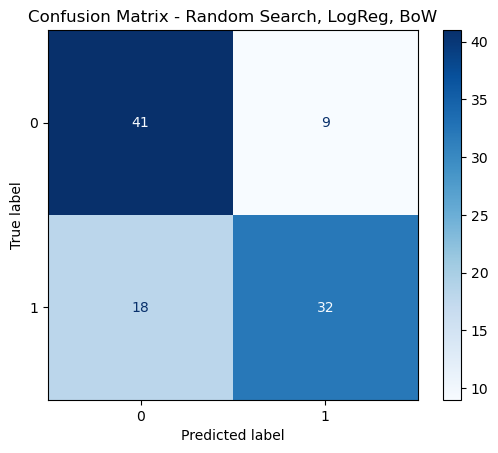

In [79]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_onion,
    y_onion_pred,
    cmap="Blues"
)

plt.title("Confusion Matrix - Random Search, LogReg, BoW")
plt.show()